In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zindi-insuranceassurance/train.csv
/kaggle/input/zindi-insuranceassurance/sample_sub.csv
/kaggle/input/zindi-insuranceassurance/VariableDefintions.txt
/kaggle/input/zindi-insuranceassurance/policy_data.csv
/kaggle/input/zindi-insuranceassurance/client_data.csv
/kaggle/input/zindi-insuranceassurance/payment_history.csv


In [2]:
policy=pd.read_csv('/kaggle/input/zindi-insuranceassurance/policy_data.csv')
payment=pd.read_csv('/kaggle/input/zindi-insuranceassurance/payment_history.csv')
client=pd.read_csv('/kaggle/input/zindi-insuranceassurance/client_data.csv')
sample_sub=pd.read_csv('/kaggle/input/zindi-insuranceassurance/sample_sub.csv')
df=pd.read_csv('/kaggle/input/zindi-insuranceassurance/train.csv')

In [3]:
df['Lapse Year'].value_counts()

?       43707
2019     5007
2018     2561
2017      410
Name: Lapse Year, dtype: int64

In [4]:
test = df[(df['Lapse']=='?') & (df['Lapse Year']=='?')]
train = df[(df['Lapse']!='?') & (df['Lapse Year']!='?')]

In [5]:
test['Lapse'].replace({'?':np.nan},inplace=True)
test.drop(['Lapse Year'],axis=1,inplace=True)
test.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Policy ID,Lapse
0,PID_4928TWH,NaN
1,PID_KBLLEGK,NaN
2,PID_90F0QA3,NaN
3,PID_18F3NHF,NaN
4,PID_SX4QUVO,NaN


In [6]:
# df

In [7]:
df['Lapse'].replace({'?':0},inplace=True)
df['Lapse Year'].replace({'?':'2019','2017':'2019','2018':'2019'},inplace=True)
df.head()

,Policy ID,Lapse,Lapse Year
0,PID_4928TWH,0,2019
1,PID_KBLLEGK,0,2019
2,PID_90F0QA3,0,2019
3,PID_18F3NHF,0,2019
4,PID_SX4QUVO,0,2019


In [8]:
df['Lapse']=df['Lapse'].astype(np.int)

In [9]:
df.groupby(['Lapse Year'])['Lapse'].mean()

Lapse Year
2019    0.154358
Name: Lapse, dtype: float64

In [10]:
df['Lapse Year'].value_counts()

2019    51685
Name: Lapse Year, dtype: int64

In [11]:
df = df[df['Lapse Year']=='2019']

In [12]:
# train['Policy ID X Year']=train['Policy ID'].astype(str)+" X "+train['Lapse Year'].astype(str)
# train

# year=pd.DataFrame({'Year':['2017','2018','2019']})
# year

# train1 = (
#     train.assign(key=1)
#     .merge(year.assign(key=1), on="key")
#     .drop("key", axis=1)
# )
# train1

# train1['Policy ID X Year']=train1['Policy ID'].astype(str)+" X "+train1['Year'].astype(str)
# train1

# train1['Lapse']=0

# train1.loc[train1['Policy ID X Year'].isin(train['Policy ID X Year']), 'Lapse'] = 1
# train1

# train1.drop(['Policy ID X Year','Lapse Year'],axis=1,inplace=True)

# train1

In [13]:
policy['NP2_EFFECTDATE']=pd.to_datetime(policy['NP2_EFFECTDATE'])
policy

,Policy ID,NP2_EFFECTDATE,PPR_PRODCD,NPR_PREMIUM,NPH_LASTNAME,CLF_LIFECD,NSP_SUBPROPOSAL,NPR_SUMASSURED,NLO_TYPE,NLO_AMOUNT,AAG_AGCODE,PCL_LOCATCODE,OCCUPATION,CATEGORY
0,PID_EPZDSP8,2019-01-09,PPR_PRODCD_B2KVCE7,265.724174,NPH_LASTNAME_BPN2LEB,2,222,NaN,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_APWOOPE,PCL_LOCATCODE_7SHK7I9,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB
1,PID_6M6G9IB,2018-01-08,PPR_PRODCD_64QNIHM,2795.069380,NPH_LASTNAME_U2H3GC6,1,111,213380.713197,NLO_TYPE_XTHV3A3,609.054794,AAG_AGCODE_9Z3FBGA,PCL_LOCATCODE_7VFS3EQ,OCCUPATION_IKCIDKW,CATEGORY_R821UZV
2,PID_UL0F7LH,2017-01-08,PPR_PRODCD_KOFUYNN,2492.759107,NPH_LASTNAME_B68RERV,1,111,238857.872515,NLO_TYPE_XAJI0Y6,1339.461987,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NUJZA7T,CATEGORY_8DALFYO
3,PID_TRGUBTU,2018-01-04,PPR_PRODCD_KOFUYNN,3982.538095,NPH_LASTNAME_NPN3VGI,1,111,74968.903115,NLO_TYPE_XAJI0Y6,7870.961557,AAG_AGCODE_1OCF2N0,PCL_LOCATCODE_SPQHMX5,OCCUPATION_W9XA3KX,CATEGORY_LXSLG6M
4,PID_TODLPIB,2019-01-12,PPR_PRODCD_KOFUYNN,1143.953733,NPH_LASTNAME_9VSNH0E,3,555,238857.872515,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_E31VV8B,PCL_LOCATCODE_0T6GYGX,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282810,PID_7P0IXF8,2017-01-05,PPR_PRODCD_KOFUYNN,2109.812579,NPH_LASTNAME_C11UH3D,3,555,74968.903115,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_1OCF2N0,PCL_LOCATCODE_SPQHMX5,OCCUPATION_IKCIDKW,CATEGORY_R821UZV
282811,PID_Q1QLPUQ,2018-01-11,PPR_PRODCD_KOFUYNN,346.027849,NPH_LASTNAME_4PA8HYE,2,222,45513.429325,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_M4MM4QC,PCL_LOCATCODE_SPQHMX5,OCCUPATION_IKCIDKW,CATEGORY_R821UZV
282812,PID_NEDS3A9,2017-01-07,PPR_PRODCD_KOFUYNN,217.975890,NPH_LASTNAME_XF7JXJN,3,333,45513.429325,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_DAP1YRU,PCL_LOCATCODE_0T6GYGX,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB
282813,PID_U8QKEJK,2017-01-06,PPR_PRODCD_W0F6GK1,5233.874657,NPH_LASTNAME_TE9AFPP,2,222,238857.872515,NLO_TYPE_XAJI0Y6,1075.892081,AAG_AGCODE_L1YVKZO,PCL_LOCATCODE_PEU5TF2,OCCUPATION_IKCIDKW,CATEGORY_R821UZV


In [14]:
policy[['NPR_PREMIUM_cumsum','NPR_SUMASSURED_cumsum','NLO_AMOUNT_cumsum']]=policy.groupby('Policy ID').cumsum()[['NPR_PREMIUM','NPR_SUMASSURED','NLO_AMOUNT']]

In [15]:
policy['cumcount']=policy.groupby('Policy ID').cumcount()

In [16]:
# policy.groupby(['NPH_LASTNAME']).mean()

In [17]:
# policy.groupby(['Policy ID','PPR_PRODCD']).mean()

In [18]:
# policy['NP2_EFFECTDATE_month']=policy['NP2_EFFECTDATE'].dt.month
policy['NP2_EFFECTDATE_day']=policy['NP2_EFFECTDATE'].dt.day
policy['NP2_EFFECTDATE_year']=policy['NP2_EFFECTDATE'].dt.year

policy.head()

,Policy ID,NP2_EFFECTDATE,PPR_PRODCD,NPR_PREMIUM,NPH_LASTNAME,CLF_LIFECD,NSP_SUBPROPOSAL,NPR_SUMASSURED,NLO_TYPE,NLO_AMOUNT,AAG_AGCODE,PCL_LOCATCODE,OCCUPATION,CATEGORY,NPR_PREMIUM_cumsum,NPR_SUMASSURED_cumsum,NLO_AMOUNT_cumsum,cumcount,NP2_EFFECTDATE_day,NP2_EFFECTDATE_year
0,PID_EPZDSP8,2019-01-09,PPR_PRODCD_B2KVCE7,265.724174,NPH_LASTNAME_BPN2LEB,2,222,NaN,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_APWOOPE,PCL_LOCATCODE_7SHK7I9,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,265.724174,NaN,NaN,0,9,2019
1,PID_6M6G9IB,2018-01-08,PPR_PRODCD_64QNIHM,2795.069380,NPH_LASTNAME_U2H3GC6,1,111,213380.713197,NLO_TYPE_XTHV3A3,609.054794,AAG_AGCODE_9Z3FBGA,PCL_LOCATCODE_7VFS3EQ,OCCUPATION_IKCIDKW,CATEGORY_R821UZV,2795.069380,213380.713197,609.054794,0,8,2018
2,PID_UL0F7LH,2017-01-08,PPR_PRODCD_KOFUYNN,2492.759107,NPH_LASTNAME_B68RERV,1,111,238857.872515,NLO_TYPE_XAJI0Y6,1339.461987,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NUJZA7T,CATEGORY_8DALFYO,2492.759107,238857.872515,1339.461987,0,8,2017
3,PID_TRGUBTU,2018-01-04,PPR_PRODCD_KOFUYNN,3982.538095,NPH_LASTNAME_NPN3VGI,1,111,74968.903115,NLO_TYPE_XAJI0Y6,7870.961557,AAG_AGCODE_1OCF2N0,PCL_LOCATCODE_SPQHMX5,OCCUPATION_W9XA3KX,CATEGORY_LXSLG6M,3982.538095,74968.903115,7870.961557,0,4,2018
4,PID_TODLPIB,2019-01-12,PPR_PRODCD_KOFUYNN,1143.953733,NPH_LASTNAME_9VSNH0E,3,555,238857.872515,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_E31VV8B,PCL_LOCATCODE_0T6GYGX,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,1143.953733,238857.872515,NaN,0,12,2019


In [19]:
# policy['NPR_SUMASSURED']/(policy['NPR_PREMIUM']+policy['NLO_AMOUNT'])

In [20]:
# policy['F1'] = policy['NPR_SUMASSURED']/policy['NPR_PREMIUM']

# policy['F2'] = policy['NPR_SUMASSURED']/(policy['NPR_PREMIUM']+policy['NLO_AMOUNT'])

train[train['Policy ID']=='PID_UL0F7LH']

,Policy ID,Lapse,Lapse Year


In [21]:
policy[policy['Policy ID']=='PID_UL0F7LH']

,Policy ID,NP2_EFFECTDATE,PPR_PRODCD,NPR_PREMIUM,NPH_LASTNAME,CLF_LIFECD,NSP_SUBPROPOSAL,NPR_SUMASSURED,NLO_TYPE,NLO_AMOUNT,AAG_AGCODE,PCL_LOCATCODE,OCCUPATION,CATEGORY,NPR_PREMIUM_cumsum,NPR_SUMASSURED_cumsum,NLO_AMOUNT_cumsum,cumcount,NP2_EFFECTDATE_day,NP2_EFFECTDATE_year
2,PID_UL0F7LH,2017-01-08,PPR_PRODCD_KOFUYNN,2492.759107,NPH_LASTNAME_B68RERV,1,111,238857.872515,NLO_TYPE_XAJI0Y6,1339.461987,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NUJZA7T,CATEGORY_8DALFYO,2492.759107,2.388579e+05,1339.461987,0,8,2017
7914,PID_UL0F7LH,2017-01-08,PPR_PRODCD_KOFUYNN,319.397626,NPH_LASTNAME_B68RERV,6,555,74968.903115,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,2812.156733,3.138268e+05,NaN,1,8,2017
10546,PID_UL0F7LH,2018-01-05,PPR_PRODCD_KOFUYNN,2492.759107,NPH_LASTNAME_B68RERV,1,111,238857.872515,NLO_TYPE_XAJI0Y6,1339.461987,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NUJZA7T,CATEGORY_8DALFYO,5304.915839,5.526846e+05,2678.923974,2,5,2018
12556,PID_UL0F7LH,2018-01-05,PPR_PRODCD_KOFUYNN,277.728626,NPH_LASTNAME_B68RERV,6,666,74968.903115,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,5582.644465,6.276536e+05,NaN,3,5,2018
23993,PID_UL0F7LH,2018-01-05,PPR_PRODCD_B2KVCE7,191.160414,NPH_LASTNAME_B68RERV,6,666,0.000000,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,5773.804880,6.276536e+05,NaN,4,5,2018
24280,PID_UL0F7LH,2018-01-04,PPR_PRODCD_B2KVCE7,265.724174,NPH_LASTNAME_B68RERV,2,222,0.000000,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,6039.529054,6.276536e+05,NaN,5,4,2018
33121,PID_UL0F7LH,2018-01-04,PPR_PRODCD_B2KVCE7,265.724174,NPH_LASTNAME_B68RERV,6,444,0.000000,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,6305.253227,6.276536e+05,NaN,6,4,2018
45078,PID_UL0F7LH,2018-01-04,PPR_PRODCD_KOFUYNN,2492.759107,NPH_LASTNAME_B68RERV,1,111,238857.872515,NLO_TYPE_XAJI0Y6,1339.461987,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NUJZA7T,CATEGORY_8DALFYO,8798.012334,8.665114e+05,4018.385960,7,4,2018
46600,PID_UL0F7LH,2018-01-05,PPR_PRODCD_B2KVCE7,265.724174,NPH_LASTNAME_B68RERV,6,444,0.000000,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,9063.736508,8.665114e+05,NaN,8,5,2018
75862,PID_UL0F7LH,2018-01-04,PPR_PRODCD_B2KVCE7,191.160414,NPH_LASTNAME_B68RERV,3,333,0.000000,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB,9254.896922,8.665114e+05,NaN,9,4,2018


In [22]:
# policy.groupby(['NPH_LASTNAME']).mean()


c=['count','nunique']
n=['min','max','sum','mean']
d={  'PPR_PRODCD':c, 'NPR_PREMIUM':n,'NP2_EFFECTDATE':c,
       'Policy ID':c, 'CLF_LIFECD':c, 'NSP_SUBPROPOSAL':c, 'NPR_SUMASSURED':n,
       'NLO_TYPE':c, 'NLO_AMOUNT':n, 'AAG_AGCODE':c, 'PCL_LOCATCODE':c, 'OCCUPATION':c,
       'CATEGORY':c}
ls = policy.groupby('NPH_LASTNAME').agg(d)

ls.columns=['FL_' + '_'.join(col).strip() for col in ls.columns.values]
ls.reset_index(inplace=True)
ls

,NPH_LASTNAME,FL_PPR_PRODCD_count,FL_PPR_PRODCD_nunique,FL_NPR_PREMIUM_min,FL_NPR_PREMIUM_max,FL_NPR_PREMIUM_sum,FL_NPR_PREMIUM_mean,FL_NP2_EFFECTDATE_count,FL_NP2_EFFECTDATE_nunique,FL_Policy ID_count,FL_Policy ID_nunique,FL_CLF_LIFECD_count,FL_CLF_LIFECD_nunique,FL_NSP_SUBPROPOSAL_count,FL_NSP_SUBPROPOSAL_nunique,FL_NPR_SUMASSURED_min,FL_NPR_SUMASSURED_max,FL_NPR_SUMASSURED_sum,FL_NPR_SUMASSURED_mean,FL_NLO_TYPE_count,FL_NLO_TYPE_nunique,FL_NLO_AMOUNT_min,FL_NLO_AMOUNT_max,FL_NLO_AMOUNT_sum,FL_NLO_AMOUNT_mean,FL_AAG_AGCODE_count,FL_AAG_AGCODE_nunique,FL_PCL_LOCATCODE_count,FL_PCL_LOCATCODE_nunique,FL_OCCUPATION_count,FL_OCCUPATION_nunique,FL_CATEGORY_count,FL_CATEGORY_nunique
0,NPH_LASTNAME_000HFMO,4,1,4603.988068,4603.988068,18415.952271,4603.988068,4,2,4,1,4,1,4,1,143964.463454,143964.463454,5.758579e+05,143964.463454,4,2,776.012205,1003.224115,3558.472639,889.618160,4,1,4,1,4,1,4,1
1,NPH_LASTNAME_0014PI3,10,2,191.160414,474.985456,2377.254847,237.725485,10,1,10,1,10,2,10,5,45513.429325,45513.429325,2.275671e+05,45513.429325,10,2,1339.461987,1339.461987,1339.461987,1339.461987,10,1,10,1,10,2,10,1
2,NPH_LASTNAME_005S1QQ,2,2,265.724174,411.457063,677.181237,338.590618,2,1,2,1,2,1,2,1,45513.429325,45513.429325,4.551343e+04,45513.429325,2,2,1339.461987,1339.461987,1339.461987,1339.461987,2,1,2,1,2,1,2,1
3,NPH_LASTNAME_005WDNL,4,2,191.160414,217.975890,818.272609,204.568152,4,2,4,1,4,1,4,1,0.000000,45513.429325,9.102686e+04,30342.286217,4,1,NaN,NaN,0.000000,NaN,4,1,4,1,4,1,4,1
4,NPH_LASTNAME_00634IA,12,3,191.160414,4603.988068,23729.689939,1977.474162,12,4,12,4,12,3,12,4,45513.429325,237135.677814,1.148571e+06,143571.359900,12,3,660.835465,1003.224115,3294.396073,823.599018,12,4,12,3,12,3,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25270,NPH_LASTNAME_ZZSKU3O,2,2,265.724174,409.411987,675.136161,337.568080,2,1,2,1,2,1,2,1,74968.903115,74968.903115,7.496890e+04,74968.903115,2,1,NaN,NaN,0.000000,NaN,2,1,2,1,2,1,2,1
25271,NPH_LASTNAME_ZZTL246,16,2,191.160414,2915.304278,9227.727393,576.732962,16,2,16,2,16,3,16,5,74968.903115,145010.003453,8.098745e+05,101234.315741,16,2,1339.461987,1339.461987,2678.923974,1339.461987,16,2,16,1,16,3,16,2
25272,NPH_LASTNAME_ZZUAU0I,1,1,1243.869117,1243.869117,1243.869117,1243.869117,1,1,1,1,1,1,1,1,145010.003453,145010.003453,1.450100e+05,145010.003453,1,1,215.354032,215.354032,215.354032,215.354032,1,1,1,1,1,1,1,1
25273,NPH_LASTNAME_ZZZ6CTE,18,2,191.160414,677.744682,6585.039294,365.835516,18,3,18,2,18,4,18,4,45513.429325,74968.903115,6.452647e+05,71696.072694,18,2,1339.461987,1339.461987,2678.923974,1339.461987,18,2,18,2,18,2,18,1


In [23]:
policy=policy.merge(ls,on='NPH_LASTNAME')

In [24]:

policy.columns


Index(['Policy ID', 'NP2_EFFECTDATE', 'PPR_PRODCD', 'NPR_PREMIUM',
       'NPH_LASTNAME', 'CLF_LIFECD', 'NSP_SUBPROPOSAL', 'NPR_SUMASSURED',
       'NLO_TYPE', 'NLO_AMOUNT', 'AAG_AGCODE', 'PCL_LOCATCODE', 'OCCUPATION',
       'CATEGORY', 'NPR_PREMIUM_cumsum', 'NPR_SUMASSURED_cumsum',
       'NLO_AMOUNT_cumsum', 'cumcount', 'NP2_EFFECTDATE_day',
       'NP2_EFFECTDATE_year', 'FL_PPR_PRODCD_count', 'FL_PPR_PRODCD_nunique',
       'FL_NPR_PREMIUM_min', 'FL_NPR_PREMIUM_max', 'FL_NPR_PREMIUM_sum',
       'FL_NPR_PREMIUM_mean', 'FL_NP2_EFFECTDATE_count',
       'FL_NP2_EFFECTDATE_nunique', 'FL_Policy ID_count',
       'FL_Policy ID_nunique', 'FL_CLF_LIFECD_count', 'FL_CLF_LIFECD_nunique',
       'FL_NSP_SUBPROPOSAL_count', 'FL_NSP_SUBPROPOSAL_nunique',
       'FL_NPR_SUMASSURED_min', 'FL_NPR_SUMASSURED_max',
       'FL_NPR_SUMASSURED_sum', 'FL_NPR_SUMASSURED_mean', 'FL_NLO_TYPE_count',
       'FL_NLO_TYPE_nunique', 'FL_NLO_AMOUNT_min', 'FL_NLO_AMOUNT_max',
       'FL_NLO_AMOUNT_sum', 'FL_NLO

In [25]:
c=['count','nunique']
n=['min','max','sum','mean']
d={ 'NP2_EFFECTDATE':c, 'PPR_PRODCD':c, 'NPR_PREMIUM':n,
       'NPH_LASTNAME':c, 'CLF_LIFECD':c, 'NSP_SUBPROPOSAL':c, 'NPR_SUMASSURED':n,
       'NLO_TYPE':c, 'NLO_AMOUNT':n, 'AAG_AGCODE':c, 'PCL_LOCATCODE':c, 'OCCUPATION':c,
       'CATEGORY':c, 'NPR_PREMIUM_cumsum':n, 'NPR_SUMASSURED_cumsum':n,
       'NLO_AMOUNT_cumsum':n, 'cumcount':n, 'NP2_EFFECTDATE_day':['unique'],
       'NP2_EFFECTDATE_year':['unique']}

for k in ['FL_PPR_PRODCD_count', 'FL_PPR_PRODCD_nunique',
       'FL_NPR_PREMIUM_min', 'FL_NPR_PREMIUM_max', 'FL_NPR_PREMIUM_sum',
       'FL_NPR_PREMIUM_mean', 'FL_NP2_EFFECTDATE_count',
       'FL_NP2_EFFECTDATE_nunique', 'FL_Policy ID_count',
       'FL_Policy ID_nunique', 'FL_CLF_LIFECD_count', 'FL_CLF_LIFECD_nunique',
       'FL_NSP_SUBPROPOSAL_count', 'FL_NSP_SUBPROPOSAL_nunique',
       'FL_NPR_SUMASSURED_min', 'FL_NPR_SUMASSURED_max',
       'FL_NPR_SUMASSURED_sum', 'FL_NPR_SUMASSURED_mean', 'FL_NLO_TYPE_count',
       'FL_NLO_TYPE_nunique', 'FL_NLO_AMOUNT_min', 'FL_NLO_AMOUNT_max',
       'FL_NLO_AMOUNT_sum', 'FL_NLO_AMOUNT_mean', 'FL_AAG_AGCODE_count',
       'FL_AAG_AGCODE_nunique', 'FL_PCL_LOCATCODE_count',
       'FL_PCL_LOCATCODE_nunique', 'FL_OCCUPATION_count',
       'FL_OCCUPATION_nunique', 'FL_CATEGORY_count', 'FL_CATEGORY_nunique']:
    d[k]=n
pol = policy.groupby('Policy ID').agg(d)

In [26]:
pol.columns=['FI_' + '_'.join(col).strip() for col in pol.columns.values]
pol.reset_index(inplace=True)
pol

,Policy ID,FI_NP2_EFFECTDATE_count,FI_NP2_EFFECTDATE_nunique,FI_PPR_PRODCD_count,FI_PPR_PRODCD_nunique,FI_NPR_PREMIUM_min,FI_NPR_PREMIUM_max,FI_NPR_PREMIUM_sum,FI_NPR_PREMIUM_mean,FI_NPH_LASTNAME_count,FI_NPH_LASTNAME_nunique,FI_CLF_LIFECD_count,FI_CLF_LIFECD_nunique,FI_NSP_SUBPROPOSAL_count,FI_NSP_SUBPROPOSAL_nunique,FI_NPR_SUMASSURED_min,FI_NPR_SUMASSURED_max,FI_NPR_SUMASSURED_sum,FI_NPR_SUMASSURED_mean,FI_NLO_TYPE_count,FI_NLO_TYPE_nunique,FI_NLO_AMOUNT_min,FI_NLO_AMOUNT_max,FI_NLO_AMOUNT_sum,FI_NLO_AMOUNT_mean,FI_AAG_AGCODE_count,FI_AAG_AGCODE_nunique,FI_PCL_LOCATCODE_count,FI_PCL_LOCATCODE_nunique,FI_OCCUPATION_count,FI_OCCUPATION_nunique,FI_CATEGORY_count,FI_CATEGORY_nunique,FI_NPR_PREMIUM_cumsum_min,FI_NPR_PREMIUM_cumsum_max,FI_NPR_PREMIUM_cumsum_sum,FI_NPR_PREMIUM_cumsum_mean,FI_NPR_SUMASSURED_cumsum_min,FI_NPR_SUMASSURED_cumsum_max,FI_NPR_SUMASSURED_cumsum_sum,FI_NPR_SUMASSURED_cumsum_mean,FI_NLO_AMOUNT_cumsum_min,FI_NLO_AMOUNT_cumsum_max,FI_NLO_AMOUNT_cumsum_sum,FI_NLO_AMOUNT_cumsum_mean,FI_cumcount_min,FI_cumcount_max,FI_cumcount_sum,FI_cumcount_mean,FI_NP2_EFFECTDATE_day_unique,...,FI_FL_NLO_TYPE_nunique_sum,FI_FL_NLO_TYPE_nunique_mean,FI_FL_NLO_AMOUNT_min_min,FI_FL_NLO_AMOUNT_min_max,FI_FL_NLO_AMOUNT_min_sum,FI_FL_NLO_AMOUNT_min_mean,FI_FL_NLO_AMOUNT_max_min,FI_FL_NLO_AMOUNT_max_max,FI_FL_NLO_AMOUNT_max_sum,FI_FL_NLO_AMOUNT_max_mean,FI_FL_NLO_AMOUNT_sum_min,FI_FL_NLO_AMOUNT_sum_max,FI_FL_NLO_AMOUNT_sum_sum,FI_FL_NLO_AMOUNT_sum_mean,FI_FL_NLO_AMOUNT_mean_min,FI_FL_NLO_AMOUNT_mean_max,FI_FL_NLO_AMOUNT_mean_sum,FI_FL_NLO_AMOUNT_mean_mean,FI_FL_AAG_AGCODE_count_min,FI_FL_AAG_AGCODE_count_max,FI_FL_AAG_AGCODE_count_sum,FI_FL_AAG_AGCODE_count_mean,FI_FL_AAG_AGCODE_nunique_min,FI_FL_AAG_AGCODE_nunique_max,FI_FL_AAG_AGCODE_nunique_sum,FI_FL_AAG_AGCODE_nunique_mean,FI_FL_PCL_LOCATCODE_count_min,FI_FL_PCL_LOCATCODE_count_max,FI_FL_PCL_LOCATCODE_count_sum,FI_FL_PCL_LOCATCODE_count_mean,FI_FL_PCL_LOCATCODE_nunique_min,FI_FL_PCL_LOCATCODE_nunique_max,FI_FL_PCL_LOCATCODE_nunique_sum,FI_FL_PCL_LOCATCODE_nunique_mean,FI_FL_OCCUPATION_count_min,FI_FL_OCCUPATION_count_max,FI_FL_OCCUPATION_count_sum,FI_FL_OCCUPATION_count_mean,FI_FL_OCCUPATION_nunique_min,FI_FL_OCCUPATION_nunique_max,FI_FL_OCCUPATION_nunique_sum,FI_FL_OCCUPATION_nunique_mean,FI_FL_CATEGORY_count_min,FI_FL_CATEGORY_count_max,FI_FL_CATEGORY_count_sum,FI_FL_CATEGORY_count_mean,FI_FL_CATEGORY_nunique_min,FI_FL_CATEGORY_nunique_max,FI_FL_CATEGORY_nunique_sum,FI_FL_CATEGORY_nunique_mean
0,PID_000OJE4,8,1,8,2,191.160414,820.226234,2680.608650,335.076081,8,3,8,4,8,4,45513.429325,45513.429325,182053.717301,45513.429325,8,2,1339.461987,1339.461987,1339.461987,1339.461987,8,1,8,1,8,2,8,1,265.724174,2680.608650,12991.205097,1623.900637,45513.429325,182053.717301,4.551343e+05,113783.573313,1339.461987,1339.461987,1339.461987,1339.461987,0,7,28,3.5,[3],...,18,2.250000,217.975890,1339.461987,8472.723701,1059.090463,1339.461987,7870.961557,40555.500196,5069.437524,1339.461987,3.083682e+04,1.065521e+05,1.331901e+04,994.736184,3516.628510,18734.910383,2341.863798,3,72,206,25.750000,2,23,62,7.750000,3,72,206,25.750000,1,10,34,4.250000,3,72,206,25.750000,2,11,42,5.250000,3,72,206,25.750000,1,4,22,2.750000
1,PID_000YE7B,2,1,2,2,614.308232,5310.408521,5924.716752,2962.358376,2,1,2,1,2,1,45513.429325,393442.396414,438955.825739,219477.912870,2,2,1398.351185,1398.351185,1398.351185,1398.351185,2,1,2,1,2,1,2,1,5310.408521,5924.716752,11235.125273,5617.562636,393442.396414,438955.825739,8.323982e+05,416199.111076,1398.351185,1398.351185,1398.351185,1398.351185,0,1,1,0.5,[8],...,10,5.000000,132.332605,132.332605,264.665211,132.332605,9800.385485,9800.385485,19600.770970,9800.385485,98698.818979,9.869882e+04,1.973976e+05,9.869882e+04,1218.503938,1218.503938,2437.007876,1218.503938,280,280,560,280.000000,59,59,118,59.000000,280,280,560,280.000000,13,13,26,13.000000,280,280,560,280.000000,18,18,36,18.000000,280,280,560,280.000000,4,4,8,4.000000
2,PID_002B54Z,12,1,12,2,191.160414,566.366602,3979.

In [27]:
pol['FI_NP2_EFFECTDATE_year_unique']=pol['FI_NP2_EFFECTDATE_year_unique'].apply(lambda x: x[0])
# pol['FI_NP2_EFFECTDATE_month_unique']=pol['FI_NP2_EFFECTDATE_month_unique'].apply(lambda x: x[0])
pol['FI_NP2_EFFECTDATE_day_unique']=pol['FI_NP2_EFFECTDATE_day_unique'].apply(lambda x: x[0])

In [28]:
# pol.drop('FI_NP2_EFFECTDATE_month_unique',axis=1,inplace=True)

In [29]:
# ls.columns


In [30]:
df

,Policy ID,Lapse,Lapse Year
0,PID_4928TWH,0,2019
1,PID_KBLLEGK,0,2019
2,PID_90F0QA3,0,2019
3,PID_18F3NHF,0,2019
4,PID_SX4QUVO,0,2019
...,...,...,...
51680,PID_C7EJ59O,1,2019
51681,PID_98JLBWI,0,2019
51682,PID_HM8H99C,0,2019
51683,PID_KQH5U5I,0,2019


In [31]:
df = df.merge(pol,on='Policy ID')

In [32]:
df

,Policy ID,Lapse,Lapse Year,FI_NP2_EFFECTDATE_count,FI_NP2_EFFECTDATE_nunique,FI_PPR_PRODCD_count,FI_PPR_PRODCD_nunique,FI_NPR_PREMIUM_min,FI_NPR_PREMIUM_max,FI_NPR_PREMIUM_sum,FI_NPR_PREMIUM_mean,FI_NPH_LASTNAME_count,FI_NPH_LASTNAME_nunique,FI_CLF_LIFECD_count,FI_CLF_LIFECD_nunique,FI_NSP_SUBPROPOSAL_count,FI_NSP_SUBPROPOSAL_nunique,FI_NPR_SUMASSURED_min,FI_NPR_SUMASSURED_max,FI_NPR_SUMASSURED_sum,FI_NPR_SUMASSURED_mean,FI_NLO_TYPE_count,FI_NLO_TYPE_nunique,FI_NLO_AMOUNT_min,FI_NLO_AMOUNT_max,FI_NLO_AMOUNT_sum,FI_NLO_AMOUNT_mean,FI_AAG_AGCODE_count,FI_AAG_AGCODE_nunique,FI_PCL_LOCATCODE_count,FI_PCL_LOCATCODE_nunique,FI_OCCUPATION_count,FI_OCCUPATION_nunique,FI_CATEGORY_count,FI_CATEGORY_nunique,FI_NPR_PREMIUM_cumsum_min,FI_NPR_PREMIUM_cumsum_max,FI_NPR_PREMIUM_cumsum_sum,FI_NPR_PREMIUM_cumsum_mean,FI_NPR_SUMASSURED_cumsum_min,FI_NPR_SUMASSURED_cumsum_max,FI_NPR_SUMASSURED_cumsum_sum,FI_NPR_SUMASSURED_cumsum_mean,FI_NLO_AMOUNT_cumsum_min,FI_NLO_AMOUNT_cumsum_max,FI_NLO_AMOUNT_cumsum_sum,FI_NLO_AMOUNT_cumsum_mean,FI_cumcount_min,FI_cumcount_max,FI_cumcount_sum,...,FI_FL_NLO_TYPE_nunique_sum,FI_FL_NLO_TYPE_nunique_mean,FI_FL_NLO_AMOUNT_min_min,FI_FL_NLO_AMOUNT_min_max,FI_FL_NLO_AMOUNT_min_sum,FI_FL_NLO_AMOUNT_min_mean,FI_FL_NLO_AMOUNT_max_min,FI_FL_NLO_AMOUNT_max_max,FI_FL_NLO_AMOUNT_max_sum,FI_FL_NLO_AMOUNT_max_mean,FI_FL_NLO_AMOUNT_sum_min,FI_FL_NLO_AMOUNT_sum_max,FI_FL_NLO_AMOUNT_sum_sum,FI_FL_NLO_AMOUNT_sum_mean,FI_FL_NLO_AMOUNT_mean_min,FI_FL_NLO_AMOUNT_mean_max,FI_FL_NLO_AMOUNT_mean_sum,FI_FL_NLO_AMOUNT_mean_mean,FI_FL_AAG_AGCODE_count_min,FI_FL_AAG_AGCODE_count_max,FI_FL_AAG_AGCODE_count_sum,FI_FL_AAG_AGCODE_count_mean,FI_FL_AAG_AGCODE_nunique_min,FI_FL_AAG_AGCODE_nunique_max,FI_FL_AAG_AGCODE_nunique_sum,FI_FL_AAG_AGCODE_nunique_mean,FI_FL_PCL_LOCATCODE_count_min,FI_FL_PCL_LOCATCODE_count_max,FI_FL_PCL_LOCATCODE_count_sum,FI_FL_PCL_LOCATCODE_count_mean,FI_FL_PCL_LOCATCODE_nunique_min,FI_FL_PCL_LOCATCODE_nunique_max,FI_FL_PCL_LOCATCODE_nunique_sum,FI_FL_PCL_LOCATCODE_nunique_mean,FI_FL_OCCUPATION_count_min,FI_FL_OCCUPATION_count_max,FI_FL_OCCUPATION_count_sum,FI_FL_OCCUPATION_count_mean,FI_FL_OCCUPATION_nunique_min,FI_FL_OCCUPATION_nunique_max,FI_FL_OCCUPATION_nunique_sum,FI_FL_OCCUPATION_nunique_mean,FI_FL_CATEGORY_count_min,FI_FL_CATEGORY_count_max,FI_FL_CATEGORY_count_sum,FI_FL_CATEGORY_count_mean,FI_FL_CATEGORY_nunique_min,FI_FL_CATEGORY_nunique_max,FI_FL_CATEGORY_nunique_sum,FI_FL_CATEGORY_nunique_mean
0,PID_4928TWH,0,2019,1,1,1,1,42911.077278,42911.077278,42911.077278,42911.077278,1,1,1,1,1,1,340667.737114,340667.737114,340667.737114,340667.737114,1,1,16702.717882,16702.717882,16702.717882,16702.717882,1,1,1,1,1,1,1,1,42911.077278,42911.077278,42911.077278,42911.077278,340667.737114,340667.737114,3.406677e+05,340667.737114,16702.717882,16702.717882,16702.717882,16702.717882,0,0,0,...,2,2.000000,1339.461987,1339.461987,1339.461987,1339.461987,16702.717882,16702.717882,16702.717882,16702.717882,2.591314e+04,2.591314e+04,2.591314e+04,2.591314e+04,8637.713809,8637.713809,8637.713809,8637.713809,9,9,9,9.000000,2,2,2,2.0,9,9,9,9.000000,2,2,2,2.000000,9,9,9,9.000000,3,3,3,3.000000,9,9,9,9.000000,2,2,2,2.000000
1,PID_KBLLEGK,0,2019,2,1,2,1,3561.268991,3561.268991,7122.537982,3561.268991,2,1,2,1,2,1,165053.885026,165053.885026,330107.770053,165053.885026,2,2,600.259636,776.012205,1376.271841,688.135920,2,1,2,1,2,1,2,1,3561.268991,7122.537982,10683.806973,5341.903487,165053.885026,330107.770053,4.951617e+05,247580.827539,600.259636,1376.271841,1976.531477,988.265738,0,1,1,...,8,4.000000,87.914960,87.914960,175.829920,87.914960,7870.961557,7870.961557,15741.923115,7870.961557,9.789676e+05,9.789676e+05,1.957935e+06,9.789676e+05,838.157168,838.157168,1676.314336,838.157168,3176,3176,6352,3176.000000,259,259,518,259.0,3176,3176,6352,3176.000000,13,13,26,13.000000,3176,3176,6352,3176.000000,63,63,126,63.000000,3176,3176,6352,3176.000000,6,6,12,6.000000
2,PID_90F0QA3,0,2019,2,1,2,1,6164.812836,6164.812836,12329.625672,6164.812836,

In [33]:
test=test.merge(pol,on='Policy ID')
test

,Policy ID,Lapse,FI_NP2_EFFECTDATE_count,FI_NP2_EFFECTDATE_nunique,FI_PPR_PRODCD_count,FI_PPR_PRODCD_nunique,FI_NPR_PREMIUM_min,FI_NPR_PREMIUM_max,FI_NPR_PREMIUM_sum,FI_NPR_PREMIUM_mean,FI_NPH_LASTNAME_count,FI_NPH_LASTNAME_nunique,FI_CLF_LIFECD_count,FI_CLF_LIFECD_nunique,FI_NSP_SUBPROPOSAL_count,FI_NSP_SUBPROPOSAL_nunique,FI_NPR_SUMASSURED_min,FI_NPR_SUMASSURED_max,FI_NPR_SUMASSURED_sum,FI_NPR_SUMASSURED_mean,FI_NLO_TYPE_count,FI_NLO_TYPE_nunique,FI_NLO_AMOUNT_min,FI_NLO_AMOUNT_max,FI_NLO_AMOUNT_sum,FI_NLO_AMOUNT_mean,FI_AAG_AGCODE_count,FI_AAG_AGCODE_nunique,FI_PCL_LOCATCODE_count,FI_PCL_LOCATCODE_nunique,FI_OCCUPATION_count,FI_OCCUPATION_nunique,FI_CATEGORY_count,FI_CATEGORY_nunique,FI_NPR_PREMIUM_cumsum_min,FI_NPR_PREMIUM_cumsum_max,FI_NPR_PREMIUM_cumsum_sum,FI_NPR_PREMIUM_cumsum_mean,FI_NPR_SUMASSURED_cumsum_min,FI_NPR_SUMASSURED_cumsum_max,FI_NPR_SUMASSURED_cumsum_sum,FI_NPR_SUMASSURED_cumsum_mean,FI_NLO_AMOUNT_cumsum_min,FI_NLO_AMOUNT_cumsum_max,FI_NLO_AMOUNT_cumsum_sum,FI_NLO_AMOUNT_cumsum_mean,FI_cumcount_min,FI_cumcount_max,FI_cumcount_sum,FI_cumcount_mean,...,FI_FL_NLO_TYPE_nunique_sum,FI_FL_NLO_TYPE_nunique_mean,FI_FL_NLO_AMOUNT_min_min,FI_FL_NLO_AMOUNT_min_max,FI_FL_NLO_AMOUNT_min_sum,FI_FL_NLO_AMOUNT_min_mean,FI_FL_NLO_AMOUNT_max_min,FI_FL_NLO_AMOUNT_max_max,FI_FL_NLO_AMOUNT_max_sum,FI_FL_NLO_AMOUNT_max_mean,FI_FL_NLO_AMOUNT_sum_min,FI_FL_NLO_AMOUNT_sum_max,FI_FL_NLO_AMOUNT_sum_sum,FI_FL_NLO_AMOUNT_sum_mean,FI_FL_NLO_AMOUNT_mean_min,FI_FL_NLO_AMOUNT_mean_max,FI_FL_NLO_AMOUNT_mean_sum,FI_FL_NLO_AMOUNT_mean_mean,FI_FL_AAG_AGCODE_count_min,FI_FL_AAG_AGCODE_count_max,FI_FL_AAG_AGCODE_count_sum,FI_FL_AAG_AGCODE_count_mean,FI_FL_AAG_AGCODE_nunique_min,FI_FL_AAG_AGCODE_nunique_max,FI_FL_AAG_AGCODE_nunique_sum,FI_FL_AAG_AGCODE_nunique_mean,FI_FL_PCL_LOCATCODE_count_min,FI_FL_PCL_LOCATCODE_count_max,FI_FL_PCL_LOCATCODE_count_sum,FI_FL_PCL_LOCATCODE_count_mean,FI_FL_PCL_LOCATCODE_nunique_min,FI_FL_PCL_LOCATCODE_nunique_max,FI_FL_PCL_LOCATCODE_nunique_sum,FI_FL_PCL_LOCATCODE_nunique_mean,FI_FL_OCCUPATION_count_min,FI_FL_OCCUPATION_count_max,FI_FL_OCCUPATION_count_sum,FI_FL_OCCUPATION_count_mean,FI_FL_OCCUPATION_nunique_min,FI_FL_OCCUPATION_nunique_max,FI_FL_OCCUPATION_nunique_sum,FI_FL_OCCUPATION_nunique_mean,FI_FL_CATEGORY_count_min,FI_FL_CATEGORY_count_max,FI_FL_CATEGORY_count_sum,FI_FL_CATEGORY_count_mean,FI_FL_CATEGORY_nunique_min,FI_FL_CATEGORY_nunique_max,FI_FL_CATEGORY_nunique_sum,FI_FL_CATEGORY_nunique_mean
0,PID_4928TWH,NaN,1,1,1,1,42911.077278,42911.077278,42911.077278,42911.077278,1,1,1,1,1,1,340667.737114,340667.737114,340667.737114,340667.737114,1,1,16702.717882,16702.717882,16702.717882,16702.717882,1,1,1,1,1,1,1,1,42911.077278,42911.077278,42911.077278,42911.077278,340667.737114,340667.737114,3.406677e+05,340667.737114,16702.717882,16702.717882,16702.717882,16702.717882,0,0,0,0.0,...,2,2.0,1339.461987,1339.461987,1339.461987,1339.461987,16702.717882,16702.717882,16702.717882,16702.717882,2.591314e+04,2.591314e+04,2.591314e+04,2.591314e+04,8637.713809,8637.713809,8637.713809,8637.713809,9,9,9,9.000000,2,2,2,2.000000,9,9,9,9.000000,2,2,2,2.000000,9,9,9,9.000000,3,3,3,3.000000,9,9,9,9.000000,2,2,2,2.000000
1,PID_KBLLEGK,NaN,2,1,2,1,3561.268991,3561.268991,7122.537982,3561.268991,2,1,2,1,2,1,165053.885026,165053.885026,330107.770053,165053.885026,2,2,600.259636,776.012205,1376.271841,688.135920,2,1,2,1,2,1,2,1,3561.268991,7122.537982,10683.806973,5341.903487,165053.885026,330107.770053,4.951617e+05,247580.827539,600.259636,1376.271841,1976.531477,988.265738,0,1,1,0.5,...,8,4.0,87.914960,87.914960,175.829920,87.914960,7870.961557,7870.961557,15741.923115,7870.961557,9.789676e+05,9.789676e+05,1.957935e+06,9.789676e+05,838.157168,838.157168,1676.314336,838.157168,3176,3176,6352,3176.000000,259,259,518,259.000000,3176,3176,6352,3176.000000,13,13,26,13.000000,3176,3176,6352,3176.000000,63,63,126,63.000000,3176,3176,6352,3176.000000,6,6,12,6.000000
2,PID_90F0QA3,NaN,2,1,2,1,6164.812836,6164.812836,12329.625672,6164.81

In [34]:
# client.groupby(['Policy ID']).mean()

In [35]:
# # len(np.intersect1d(df['Policy ID'],cl['Policy ID']))
# payment['DATEPAID']=pd.to_datetime(payment['DATEPAID'])

# payment['POSTDATE']=pd.to_datetime(payment['POSTDATE'])
# payment['PREMIUMDUEDATE']=pd.to_datetime(payment['PREMIUMDUEDATE'])
# payment['Diff1']=(payment['POSTDATE']-payment['DATEPAID'])/np.timedelta64(1,'D')
# payment['Diff2']=(payment['DATEPAID']-payment['PREMIUMDUEDATE'])/np.timedelta64(1,'D')
# payment['Diff3']=(payment['POSTDATE']-payment['PREMIUMDUEDATE'])/np.timedelta64(1,'D')

# payment.drop(['DATEPAID','POSTDATE','PREMIUMDUEDATE'],axis=1,inplace=True)
# payment

In [36]:
# d={'AMOUNTPAID':n, 'Diff1':n, 'Diff1':n, 'Diff1':n}
# py=payment.groupby('Policy ID').agg(d)
# py.columns=['FP_' + '_'.join(col).strip() for col in py.columns.values]
# py.reset_index(inplace=True)
# py

In [37]:
# df=df.merge(py,on='Policy ID',how='left')
# test=test.merge(py,on='Policy ID',how='left')

In [38]:
df.isnull().sum()

Policy ID                      0
Lapse                          0
Lapse Year                     0
FI_NP2_EFFECTDATE_count        0
FI_NP2_EFFECTDATE_nunique      0
                              ..
FI_FL_CATEGORY_count_mean      0
FI_FL_CATEGORY_nunique_min     0
FI_FL_CATEGORY_nunique_max     0
FI_FL_CATEGORY_nunique_sum     0
FI_FL_CATEGORY_nunique_mean    0
Length: 181, dtype: int64

In [39]:
# test.isnull().sum()

In [40]:
# dftest = dftest.merge(client.drop('NPH_LASTNAME',axis=1),on=['Policy ID'],how='left')
# dftest['Policy ID'].nunique()

# dftrain = dftrain.merge(client.drop('NPH_LASTNAME',axis=1),on=['Policy ID'],how='left')
# dftrain['Policy ID'].nunique()

In [41]:
# payment['DATEPAID']=pd.to_datetime(payment['DATEPAID'])

# payment['POSTDATE']=pd.to_datetime(payment['POSTDATE'])
# payment['PREMIUMDUEDATE']=pd.to_datetime(payment['PREMIUMDUEDATE'])

In [42]:
# (payment['POSTDATE']-payment['PREMIUMDUEDATE'])/np.timedelta64(1,'D')

In [43]:
# payment['Diff1']=(payment['POSTDATE']-payment['DATEPAID'])/np.timedelta64(1,'D')
# payment['Diff2']=(payment['DATEPAID']-payment['PREMIUMDUEDATE'])/np.timedelta64(1,'D')
# payment['Diff3']=(payment['POSTDATE']-payment['PREMIUMDUEDATE'])/np.timedelta64(1,'D')

# payment.drop(['DATEPAID','POSTDATE','PREMIUMDUEDATE'],axis=1,inplace=True)

In [44]:
# dftrain = dftrain.merge(payment,on=['Policy ID'],how='left')

# dftest = dftest.merge(payment,on=['Policy ID'],how='left')

In [45]:
# dftrain

In [46]:
# dfmain=dftrain.append(dftest,ignore_index=True)
# dfmain.head()

In [47]:
# dfmain['year_passed'] = dfmain['Year'].astype(np.int) - dfmain['NP2_EFFECTDATE'].dt.year

In [48]:
# dfmain.info()

In [49]:
# df.info()

In [50]:
for k in ['Policy ID','Lapse Year']:
    df[k]=df[k].astype('category')

In [51]:
# dfmain['eff_year'] = dfmain['NP2_EFFECTDATE'].dt.year

In [52]:
# dfmain['Lapse'].replace({'?':np.nan},inplace=True)

In [53]:
# dfmain.drop(['NP2_EFFECTDATE'],axis=1,inplace=True)

In [54]:
# dfmain.columns

In [55]:
# dfmain[dfmain['Policy ID']=='PID_MFAAYNJ']

In [56]:
# dfmain.groupby(['Policy ID','Year']).mean().reset_index()

In [57]:
from catboost import CatBoostClassifier,Pool, cv
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score,log_loss
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


# df_train=df[dfmain['Lapse'].isnull()==False].copy()
# df_test=df[dfmain['Lapse'].isnull()==True].reset_index(drop=True)

# print(df_train.shape,df_test.shape)

In [58]:
df['Lapse']=df['Lapse'].astype(np.int)

In [59]:
# X,y=df[df['Lapse Year']=='2019'].drop(['Lapse','Policy ID','Lapse Year'],axis=1),df[df['Lapse Year']=='2019']['Lapse']

X,y=df.drop(['Lapse','Lapse Year','Policy ID'],axis=1),df['Lapse']

In [60]:
# X,y=df[df['Lapse Year']=='2019'].drop(['Lapse','Lapse Year','Policy ID'],axis=1),df[df['Lapse Year']=='2019']['Lapse']

# Xtest=df.drop(['Lapse','Policy ID'],axis=1)
# X.columns

In [61]:
dftest=test.drop(['Lapse','Policy ID'],axis=1)
dftest.shape

(43707, 178)

In [62]:
X.shape

(51685, 178)

In [63]:
df[df['Lapse Year']=='2019']['Lapse']

0        0
1        0
2        0
3        0
4        0
        ..
51680    1
51681    0
51682    0
51683    0
51684    0
Name: Lapse, Length: 51685, dtype: int64

In [64]:
# df[df['Lapse Year']!='2019']['Lapse'].value_counts()

In [65]:

# X_val,y_val = df[df['Lapse Year']=='2019'].drop(['Lapse','Lapse Year','Policy ID'],axis=1),df[df['Lapse Year']=='2019']['Lapse']

# X_train,y_train = df[df['Lapse Year']!='2019'].drop(['Lapse','Lapse Year','Policy ID'],axis=1),df[df['Lapse Year']!='2019']['Lapse']

In [66]:
# X.info()

In [67]:
# X_train

In [68]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.20,random_state = 1994,stratify=y)

In [69]:
# m=LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
#                 importance_type='split', learning_rate=0.03,
#                max_depth=-1, min_child_samples=20, min_child_weight=0.001,
#                min_split_gain=0.0, n_estimators=7000, n_jobs=-1, num_leaves=31,
#                objective='binary', random_state=1994,
#                reg_lambda=0.0, silent=True, subsample=1.0,
#                subsample_for_bin=200000, subsample_freq=0)
# # m=RidgeCV(cv=4)
# m.fit(X_train,y_train,eval_set=[(X_val, y_val)],eval_metric='loss', early_stopping_rounds=100,verbose=200)
# pl=m.predict_proba(X_val)[:,-1]

In [70]:
# pl=m.predict_proba(X_val)[:,-1]

In [71]:
m2  = CatBoostClassifier(n_estimators=3000,eval_metric='Logloss',learning_rate=0.03, random_seed= 1994, use_best_model=True,rsm=0.9,od_wait=50)
m2.fit(X_train,y_train,eval_set=[(X_train,y_train),((X_val, y_val))], early_stopping_rounds=100,verbose=200,)#erly100

0:	learn: 0.6459307	test: 0.6459307	test1: 0.6458520	best: 0.6458520 (0)	total: 144ms	remaining: 7m 12s
200:	learn: 0.2897192	test: 0.2897192	test1: 0.3011452	best: 0.3011452 (200)	total: 12.3s	remaining: 2m 51s
400:	learn: 0.2769671	test: 0.2769671	test1: 0.2977690	best: 0.2977492 (392)	total: 24.3s	remaining: 2m 37s
600:	learn: 0.2642042	test: 0.2642042	test1: 0.2960457	best: 0.2960454 (587)	total: 36.4s	remaining: 2m 25s
800:	learn: 0.2529580	test: 0.2529580	test1: 0.2948409	best: 0.2948125 (794)	total: 48.2s	remaining: 2m 12s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2948124742
bestIteration = 794

Shrink model to first 795 iterations.


In [72]:
p=m2.predict_proba(X_val)[:,-1]

In [73]:
log_loss(y_val,pl)

NameError: name 'pl' is not defined

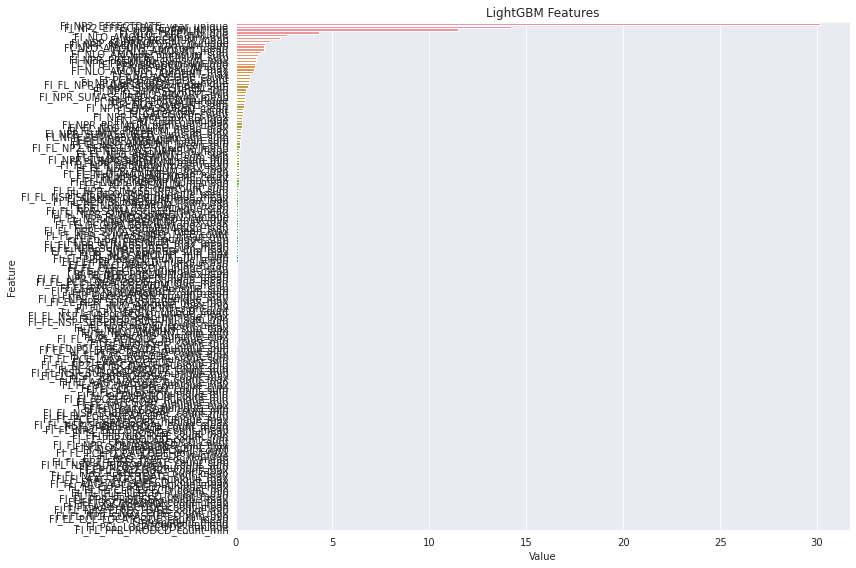

In [74]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

%matplotlib inline
feature_imp = pd.DataFrame(sorted(zip(m2.feature_importances_, X.columns), reverse=True)[:200], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [75]:
cols=feature_imp[:50]['Feature'].values

In [76]:
X,y=df.drop(['Lapse','Lapse Year','Policy ID'],axis=1),df['Lapse']
X=X[cols]
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.20,random_state = 1994,stratify=y)
m2  = CatBoostClassifier(n_estimators=3000,eval_metric='Logloss',learning_rate=0.03, random_seed= 1994, use_best_model=True,rsm=0.9,od_wait=50)
m2.fit(X_train,y_train,eval_set=[(X_train,y_train),((X_val, y_val))], early_stopping_rounds=100,verbose=200,)#erly100

0:	learn: 0.6540417	test: 0.6540417	test1: 0.6537653	best: 0.6537653 (0)	total: 46.3ms	remaining: 2m 18s
200:	learn: 0.2889250	test: 0.2889250	test1: 0.2992395	best: 0.2992395 (200)	total: 6.39s	remaining: 1m 29s
400:	learn: 0.2772390	test: 0.2772390	test1: 0.2952332	best: 0.2952332 (400)	total: 12.7s	remaining: 1m 22s
600:	learn: 0.2663203	test: 0.2663203	test1: 0.2934792	best: 0.2934792 (600)	total: 18.9s	remaining: 1m 15s
800:	learn: 0.2569260	test: 0.2569260	test1: 0.2930093	best: 0.2928818 (739)	total: 25.5s	remaining: 1m 9s
1000:	learn: 0.2482804	test: 0.2482804	test1: 0.2927478	best: 0.2926677 (936)	total: 32.1s	remaining: 1m 4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2926676564
bestIteration = 936

Shrink model to first 937 iterations.


In [77]:
# dftest['Policy ID']=dftest['Policy ID'].astype('category')
dftest=test.drop(['Lapse','Policy ID'],axis=1)
dftest=dftest[cols]

In [78]:
from catboost import CatBoostClassifier
errcb2=[]
y_pred_totcb2=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
fold=StratifiedKFold(n_splits=5)#15#5#10
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    m2  = CatBoostClassifier(n_estimators=3000,eval_metric='Logloss',learning_rate=0.03, random_seed= 1994, use_best_model=True,rsm=0.9,od_wait=50)
    m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=300,)#erly100
    preds=m2.predict_proba(X_test)[:,-1]
    print("err: ",log_loss(y_test,preds))
    errcb2.append(log_loss(y_test,preds))
    p2 = m2.predict_proba(dftest)[:,-1]
    y_pred_totcb2.append(p2)
np.mean(errcb2)

0:	learn: 0.6538281	test: 0.6538281	test1: 0.6533398	best: 0.6533398 (0)	total: 33.3ms	remaining: 1m 39s
300:	learn: 0.2842728	test: 0.2842728	test1: 0.2884871	best: 0.2884871 (300)	total: 9.58s	remaining: 1m 25s
600:	learn: 0.2686979	test: 0.2686979	test1: 0.2863586	best: 0.2863494 (599)	total: 19s	remaining: 1m 15s
900:	learn: 0.2549202	test: 0.2549202	test1: 0.2851527	best: 0.2851123 (875)	total: 28.6s	remaining: 1m 6s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2851123223
bestIteration = 875

Shrink model to first 876 iterations.
err:  0.2851123223072514
0:	learn: 0.6540353	test: 0.6540353	test1: 0.6538503	best: 0.6538503 (0)	total: 31.7ms	remaining: 1m 35s
300:	learn: 0.2835771	test: 0.2835771	test1: 0.2930022	best: 0.2929933 (299)	total: 9.44s	remaining: 1m 24s
600:	learn: 0.2676148	test: 0.2676148	test1: 0.2896307	best: 0.2896305 (597)	total: 19.3s	remaining: 1m 16s
900:	learn: 0.2542160	test: 0.2542160	test1: 0.2886306	best: 0.2885947 (896)	total: 29.2s

0.29062094692400614

In [79]:
# y_pred_tot1=[]
# err1=[]
# # feature_importance_df = pd.DataFrame()
# from sklearn.model_selection import KFold,StratifiedKFold
# fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1994)

# i=1
# for train_index, test_index in fold.split(X,y):
    
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
#     m=LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
#                 importance_type='split', learning_rate=0.03,col_sample_by_tree=0.9,
#                max_depth=-1, min_child_samples=20, min_child_weight=0.001,
#                min_split_gain=0.0, n_estimators=7000, n_jobs=-1, num_leaves=50,
#                objective='binary', random_state=1994,
#                reg_lambda=0.0, silent=True, subsample=1.0,
#                subsample_for_bin=200000, subsample_freq=0)
#     m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],early_stopping_rounds=100,verbose=200)
    
#     preds=m.predict_proba(X_test,ntree_end=m.best_iteration_)[:,-1]
#     print("err: ",log_loss(y_test,preds))
#     err1.append(log_loss(y_test,preds))
#     p = m.predict_proba(dftest)[:,-1]
#     i=i+1
#     y_pred_tot1.append(p)

In [80]:
np.mean(errcb2)

0.29062094692400614

In [81]:
y_pred=np.mean(y_pred_totcb2,0)

# y_pred=m.predict_proba(dftest,n_iterations=m.best_iteration_)[:,-1]

In [82]:
y_pred

array([1.86788696e-01, 3.68823427e-03, 2.42795812e-04, ...,
       4.16726785e-03, 1.25885667e-04, 3.77422282e-03])

In [83]:
test['Lapse']=y_pred

In [84]:
s = test[['Policy ID','Lapse']]

In [85]:
s

,Policy ID,Lapse
0,PID_4928TWH,0.186789
1,PID_KBLLEGK,0.003688
2,PID_90F0QA3,0.000243
3,PID_18F3NHF,0.001235
4,PID_SX4QUVO,0.144336
...,...,...
43702,PID_FSR6DS3,0.043853
43703,PID_98JLBWI,0.019432
43704,PID_HM8H99C,0.004167
43705,PID_KQH5U5I,0.000126


In [86]:
sum(s['Lapse']>0.5)/s.shape[0]

0.015489509689523418

In [87]:
sum(s['Lapse']>0.2)/s.shape[0]

0.28352437824604754

In [88]:
s.to_csv('sNewCB_kv14.csv',index=False)